Realizado por: Valentina Rodriguez hernandez

In [69]:
#Importar librerias
import numpy as np
import sympy as sp
import scipy as sc
import pandas as pd
from scipy.misc import derivative
from sympy import init_printing
import matplotlib.pylab as plt
from scipy import misc
from scipy.fft import fft, fftfreq
from scipy.interpolate import CubicSpline
from scipy import optimize
init_printing() 

# Tarea Derivada

Los siguientes datos, son datos experimentales de un péndulo simple tomadas a través de una cámara web y procesados con el programa kinovea. Dados los datos en formato csv, se pide  construir un programa que realice lo siguiente: 

1. Leer el archivo csv a través de un Data Frame de Pandas, las columnas del data frame deberan ser:

col=["Tiempo[ms]", "AnguloDeg", "AnguloRad"]

2. Construya una grafica de :
plt.plot(df['Tiempo[ms]'], df['AnguloDeg'],"b-")

¿Qué puede concluir respecto al movimiento del pendulo?


3. Calculo la transformada de fourier de los datos obtenidos, para encontrar la frecuencia de oscilacion del sistema, para ello realice lo siguiente:

- importe la librerias de scipy fft, fftfreq.
- Aplique la transformada de fourier como sigue:

```
tf = fft(df['AnguloRad'].values)
T = 33E-3 #Paso del tiempo
N = len(df['Tiempo[ms]'])
xf = fftfreq(N, T)[:N//2]

plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"o-")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0, 2)

```

-  Para las valores en el eje x y eje y de la anterior gráfica, realice una interpolación. 

- Encuentra el valor máximo empleando metodos de diferenciación.







In [70]:
#Lectura del archivo
route = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT8btHZ-A6ChzV5Rx_CQmCzbhO10J7R6LvQAyHx9qOCoCDAL9RJgaGUATf2z5lTMo-SjByvrnaX02Cz/pub?output=csv"
df = pd.read_csv(route,";")

In [71]:
col = ["Tiempo[ms]", "AnguloDeg", "AnguloRad"]


In [72]:
#Renombrar las columnas del df
df = df.rename(columns = {'Tiempo (ms)':"Tiempo[ms]", 'Ángulo 1,':'AnguloDeg'})
df

,Tiempo[ms],AnguloDeg
0,9,"59,289611816406"
1,42,"59,9823265075684"
2,75,"61,2374534606934"
3,108,"63,49247741699"
4,142,"65,3887710571289"
...,...,...
2842,94709,"94,9375762939453"
2843,94743,"96,479850769043"
2844,94776,"97,9406890869141"
2845,94809,"99,3180923461914"


In [73]:
#Se remplaza la ',' por '.', esto para buscar cambiar el formato str a float
df["AnguloDeg"] = df["AnguloDeg"].str.replace(",", ".").astype("float64") #se pasa de string a float

In [74]:
#En la columna AnguloDeg
df["AnguloRad"] = np.deg2rad(df["AnguloDeg"].values )#se pasa de string a float

In [75]:
#Creación de una columna de angulo radian 
df["AnguloRad"] = df["AnguloRad"] - np.pi/2 #Se introduce el df
print(df["AnguloRad"])

0      -0.535997
1      -0.523907
2      -0.502001
3      -0.462644
4      -0.429547
          ...   
2842    0.086177
2843    0.113095
2844    0.138591
2845    0.162631
2846    0.185665
Name: AnguloRad, Length: 2847, dtype: float64


2. Construya una grafica de : plt.plot(df['Tiempo[ms]'], df['AnguloDeg'],"b-")

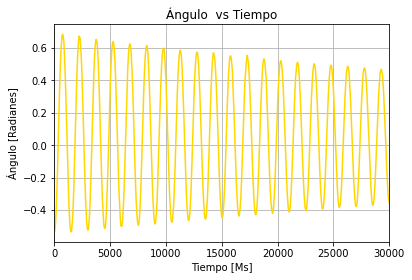

In [76]:
#Gráfica Ángulo  vs Tiempo en grados
plt.figure()
plt.plot(df["Tiempo[ms]"], df["AnguloRad"], color="gold")
plt.xlim(0, 30000 )
plt.title("Ángulo  vs Tiempo")
plt.xlabel("Tiempo [Ms]")
plt.ylabel("Ángulo [Radianes]")
plt.grid()

Por la grafica se observa que es un pendulo amortiguado ya que a medida de que transcurre el tiempo el angulo va disminuyendo hasta llegar a 0, por tanto esta perdiendo energia.

3. Calculo la transformada de fourier de los datos obtenidos, para encontrar la frecuencia de oscilacion del sistema, para ello realice lo siguiente:


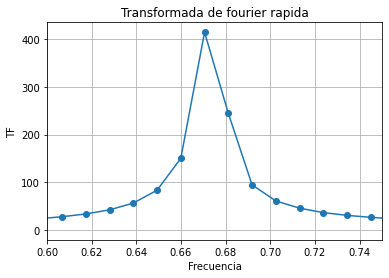

In [77]:
plt.title("Transformada de fourier rapida")
tf = fft(df['AnguloRad'].values) #Realizacion de la transformada rapida de fourier 
T = 33E-3 #Paso del tiempo
N = len(df['Tiempo[ms]']) #Longitud del tiempo
xf = fftfreq(N, T)[:N//2] #frecuencia
#Graficación
plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"o-")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0.6, 0.75)
plt.grid()

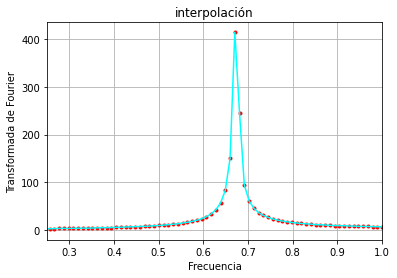

In [94]:
#interpolacion a los datos de la transformada
cs = CubicSpline(xf[1:N//2], np.abs(tf[1:N//2]))
#Graficación
plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"r.")
plt.plot(abs(xf[1:N//2]), abs(cs(xf[1:N//2])), color="aqua" ) 
plt.xlim(0.25, 1)
plt.title("interpolación")
plt.ylabel("Transformada de Fourier")
plt.xlabel("Frecuencia")
plt.grid()


In [101]:
#maximo con fmil_powel
cs = CubicSpline(xf[1:N//2], -np.abs(tf[1:N//2])) #Funcion interpolacion de la transformada rapida
# Máximo de la función cs y mínimo de cs1
min = optimize.fmin_powell(cs, 0.2)
print("valor máximo de TF: ", abs(cs(min)))
print("frecuencia en que ocurre el máximo de cs y el mínimo de cs1", min) #frecuencia con la que el pendulo se mueve 

Optimization terminated successfully.
         Current function value: -417.867925
         Iterations: 2
         Function evaluations: 44
valor máximo de TF:  417.86792463131843
frecuencia en que ocurre el máximo de cs y el mínimo de cs1 0.6715600030592099


In [103]:
#valor de la frcuencia maxima
print("La frecuencia maxima es: ", abs(cs(0.67156)))

La frecuencia maxima es:  417.86792463128836


Otra manera de hallar la frecuencia maxima de la transformada rapida de Fourier 

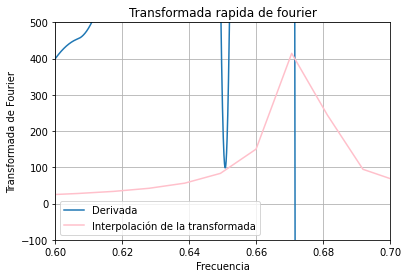

In [98]:
#se halla la derivada puesto que cuando la derivada es igual a 0 esta es o un maximo o un minimo
cs = CubicSpline(xf[1:N//2], np.abs(tf[1:N//2])) #Funcion interpolacion de la transformada rapida
x = np.linspace(0.6,0.7,5000)#funcion para evaluar
derivada = derivate(cs, x , dx = 1E-8)#Derivacion de la Funcion interpolacion de la transformada rapida
#Graficación
plt.title("Transformada rapida de fourier")
plt.plot(x,derivada, label = 'Derivada')#Grafica derivada
plt.plot(abs(xf[1:N//2]), abs(cs(xf[1:N//2])), color="pink", label = "Interpolación de la transformada")#interpolacion de la transformada rapida
#zoom
plt.xlim(0.6,0.7)
plt.ylim(-100,500)
plt.grid()#cuadricula
#Nombre ejes
plt.ylabel("Transformada de Fourier")
plt.xlabel("Frecuencia")
plt.legend()

In [87]:
#interpolacion en puntos de la derivda
d = CubicSpline(t, q)
#imprimir los ceros de la derivada para asi hallar el maximos o minimos de la frecuencia
d.roots()

array([-3.14649254,  0.58350876,  0.67156   ])

In [99]:
#evaluar en el valor 0.6716 puesto que por la imagen es el maximo que necesitamos evaluar para hallar la frecuencia
print("La frecuencia maxima es: ", abs(cs(cs2.roots()[2])))


La frecuencia maxima es:  417.86792463131843
